<a class="anchor" id="udacity_toc"></a>
# Project: Investigate a Dataset - Neighborhood Health Care Habits

## Table of Contents

* [Table of Contents](#toc)
    * [Page 1 - Introduction](#udacity_page_1)
    * [Page 2 - Data Wrangling](#udacity_page_2)
    * [Page 3 - Data Cleaning](#udacity_page_3)
    * [Page 4 - Exploratory Data Analysis ](#udacity_page_4)
    * [Page 4a - Logistic Regression](#udacity_page_5)
    * [Page 5 - Research Question 2](#udacity_page_5)
    * [Page 6 - Research Question 3](#udacity_page_6)
    * [Page 7 - Conclusions](#udacity_page_7)



<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 1 - Introduction <a class="anchor" id="udacity_page_1"></a>

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


### Dataset Description 

This dataset collects information from more than 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
This analysis explores factors influencing no-shows for medical appointments using the data. The goal of this analysis is to uncover patterns and insights that might explain why patients miss appointments and to identify areas for potential intervention.The dependent variable is no_show, indicating whether a patient missed their scheduled appointment (Yes = did not show up, No = showed up).

We examine several independent variables, including:

 __Data columns:__
* patientid: The identification of a patient
* AppointmentID: The identification of each appointment
* gender: The gender of the patient Female (F) or Male (M)
* ScheduledDay: The day someone called or registered the appointment
* AppointmentDay: The day of the actual appointment
* age: The age of the patient
* neighbourhood: The neighbourhood in which the appointment takes place
* scholarship: True (1) or False (0) and it indicates whether or not the patient is enrolled in Brazilian welfare program
* hypertension: True (1) or False (0)
* diabetes: True (1) or False (0)
* alcoholism: True (1) or False (0)
* Handcap: Levels 0-4 
* sms_received: True (1) or False (0)
* no_show: The status of the appointment, ‘No’ indicates that the patient showed up to their appointment, while ‘Yes’ indicates that they did not show up and yes, they were a no-show.

### Question(s) for Analysis

#### What factors are important for predicting whether a patient will show up for their appointment?

In this analysis, I will explore age, scholarship, and sms_received and this will be the main question that I will seek to answer. In addition, I will address two more questions that I think will add context and depth to the analysis:

#### How does the no_show rate vary across neighborhoods?

Are there neighborhoods with low no-show rates that could serve as a model for underperforming neighborhoods, with respect to no-show rates?
#### Do chronic conditions (e.g., hypertension, diabetes, alcoholism) affect the likelihood of showing up?
This question builds on the first question, and serves as an alternate hypothesis for research. If none of the factors listed in question 1 are a factor, then do chronic conditions have an effect on show rates? 

[Return to Top](#top)

In [2]:
# import statements for all of the packages that will be used. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from scipy.stats import chi2_contingency

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 2 - Data Wrangling <a class="anchor" id="udacity_page_2"></a>

> In this section of the report, I will load in the data, take a preliminary look, check for cleanliness, and then trim and clean the dataset for analysis.
> 
[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
df['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [5]:
df.isnull().sum() #check for null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.dtypes #checking data types

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Some of these datatypes will need to be converted.

In [8]:
df.info() # take a look at data types, if there are any null values, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


C:\Python3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


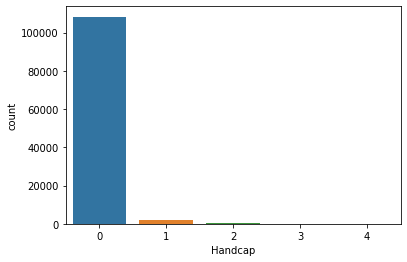

In [9]:
sns.countplot(x='Handcap', data=df)
plt.show()

In [11]:
# show summary for all columns. no need to worry about NaN values here, those show up for categorical variables, which I cover in the next cell.
round(df.describe(include = 'all'),2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,110527.00,110527,110527,110527,110527.00,110527,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5675305.12,NaN,NaN,NaN,37.09,NaN,0.1,0.2,0.07,0.03,0.02,0.32,NaN
std,2.560949e+14,71295.75,NaN,NaN,NaN,23.11,NaN,0.3,0.4,0.26,0.17,0.16,0.47,NaN
min,3.921784e+04,5030230.00,NaN,NaN,NaN,-1.00,NaN,0.0,0.0,0.00,0.00,0.00,0.00,NaN
25%,4.172614e+12,5640285.50,NaN,NaN,NaN,18.00,NaN,0.0,0.0,0.00,0.00,0.00,0.00,NaN
50%,3.173184e+13,5680573.00,NaN,NaN,NaN,37.00,NaN,0.0,0.0,0.00,0.00,0.00,0.00,NaN
75%,9.439172e+13,5725523.50,NaN,NaN,NaN,55.00,NaN,0.0,0.0,0.00,0.00,0.00,1.00,NaN


In [12]:
df.describe(include='object')  # Categorical columns and their summary statistics

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [13]:
df.shape #110527 rows of data with 14 columns

(110527, 14)

From the preceding cells we get a sense of how big our dataset is (110,527 rows and 14 columns), what kinds of values are stored in each record and if they'll need to be converted, deleted or addressed in some way, and we can start to get a sense of averages, minimums and maximums for some of the data contained within.

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 3 - Data Cleaning <a class="anchor" id="udacity_page_3"></a>




#### Cleaning the data 
> * Check for and remove null values to ensure completeness of the dataset.
> * Identify and eliminate duplicate records to avoid skewed analysis.
> * Inspect for unexpected values, such as an age of -1, and handle them appropriately.
> * Detect and address outliers to ensure they don’t disproportionately influence results.
> * Standardize categorical responses, like "Yes" vs "yes," for consistency in analysis.
> * standardize categorical responses (Yes vs yes)
> * Convert date columns to DateTime format to enable easier manipulation and accurate time-based analysis.
> * Optimize memory usage by converting object columns to categories where applicable.
> * Trim leading/trailing spaces in string values and replace dashes with underscores for uniform column naming.

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [14]:
def clean_column_names(df):
    """
    Cleans column names in a DataFrame: 
    Converts to lowercase, replaces spaces and dashes with underscores.
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_', regex=True).str.replace('-', '_', regex=True)
    return df

# Apply function to clean column names
df = clean_column_names(df)


In [15]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [16]:
df['scheduledday'] = pd.to_datetime(df['scheduledday']) #change dates to date format
df['appointmentday'] = pd.to_datetime(df['appointmentday'])


In [17]:
df = df.drop_duplicates() #drop duplicates

In [18]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Fill missing values with appropriate statistics
df['age'].fillna(df['age'].median(), inplace=True)


patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64


In [19]:
column_renames = {
    'hipertension': 'hypertension',
    'handcap': 'handicap',
    'patientid': 'patient_id',
    'appointmentid': 'appointment_id',
    'scheduledday': 'scheduled_day',
    'appointmentday': 'appointment_day'
}
df = df.rename(columns=column_renames)

#update column names for readability


In [20]:
#create a column to show how many days elapse between appointment day and scheduled day

df['waiting_time'] = (df['appointment_day'] - df['scheduled_day']).dt.days


In [21]:
df = df[df['waiting_time'] >= 0] #if there are any negative values due to data entry errors, filter dataset to include positive integers only


In [22]:
#adding appointment day's day of the week for readability
df['appointment_weekday'] = df['appointment_day'].dt.day_name()
#this can help identify patterns as to whether patients are more likely or not to miss appointments on specific days.

In [23]:
df.tail()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,appointment_weekday
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40,Tuesday
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40,Tuesday
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,40,Tuesday


In [24]:
#bin the wait time 
# first define bins and labels
waiting_time_bins = [-1, 0, 3, 7, 30, 365]  # -1 to catch negative values (if any)
waiting_time_labels = ['same_day', 'short_term', 'one_week', 'one_month', 'long_term']

# create a new column with the waiting time categories
df['waiting_time_category'] = pd.cut(df['waiting_time'], bins=waiting_time_bins, labels=waiting_time_labels)



In [25]:
df['waiting_time_category'].isnull().sum()

0

In [26]:
df['waiting_time_category'].value_counts() #how many appointments fall into each category?


waiting_time_category
one_month     27736
short_term    14752
one_week      14552
long_term      9706
same_day       5213
Name: count, dtype: int64

In [27]:
# Find rows with invalid ages
invalid_ages = df[df['age'] < 0]
print(invalid_ages)

# Filter out rows with invalid ages
df = df[df['age'] >= 0]


Empty DataFrame
Columns: [patient_id, appointment_id, gender, scheduled_day, appointment_day, age, neighbourhood, scholarship, hypertension, diabetes, alcoholism, handicap, sms_received, no_show, waiting_time, appointment_weekday, waiting_time_category]
Index: []


In [28]:
# Remove the row where 'age' is -1
df = df[df['age'] != -1]
# Verify the change
print(df[df['age'] == -1])  # This confirms an empty DataFrame

Empty DataFrame
Columns: [patient_id, appointment_id, gender, scheduled_day, appointment_day, age, neighbourhood, scholarship, hypertension, diabetes, alcoholism, handicap, sms_received, no_show, waiting_time, appointment_weekday, waiting_time_category]
Index: []


> I chose to remove this row of data, rather than impute an average, or guess at what someone may have meant when entering that row of data. Since that single value is just 0.000905% of the dataset, it's not going to affect any results by doing so.
>
> 

In [29]:
#bin ages into categories 
df['age_group'] = pd.cut(df['age'], bins=[0, 17, 40, 65, 100], labels=['child', 'young_adult', 'adult', 'senior'])


In [30]:
df['age_group'].value_counts()

age_group
adult          24895
young_adult    21512
child          14035
senior          9381
Name: count, dtype: int64

count    71959.000000
mean        38.502564
std         22.925421
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: age, dtype: float64


C:\Python3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


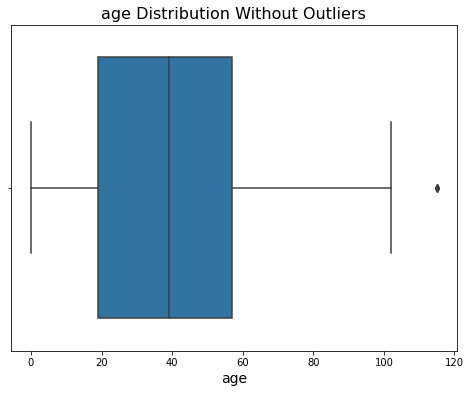

In [31]:
# Identify outliers using summary statistics
print(df['age'].describe())

# Visualize outliers and filter out extreme outliers (already fixed)
df = df[df['age'] <= 115]  # Ensure no extreme ages remain

# Plot the boxplot with the updated syntax
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)  
plt.title('age Distribution Without Outliers', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.show()


In [32]:
#eliminating outlier ages, such as the 115. Even if there were someone that age, they are an outlier.
df = df[(df['age'] >= 0) & (df['age'] <= 100)]


In [33]:
#confirm age values
print(f"the maximum age is:",df['age'].max())
print(df['age'].min())

the maximum age is: 100
0


In [34]:
# Check data types
print(df.dtypes)

# Convert columns to appropriate types
df['age'] = df['age'].astype(int)  # Example: Convert age to integer
df['appointment_day'] = pd.to_datetime(df['appointment_day'])  # Convert dates

patient_id                           float64
appointment_id                         int64
gender                                object
scheduled_day            datetime64[ns, UTC]
appointment_day          datetime64[ns, UTC]
age                                    int64
neighbourhood                         object
scholarship                            int64
hypertension                           int64
diabetes                               int64
alcoholism                             int64
handicap                               int64
sms_received                           int64
no_show                               object
waiting_time                           int64
appointment_weekday                   object
waiting_time_category               category
age_group                           category
dtype: object


In [35]:
# Convert column with mixed types to a consistent type
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [36]:
df.info() #confirm data type changes and memory usage.

<class 'pandas.core.frame.DataFrame'>
Index: 71954 entries, 5 to 110526
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   patient_id             71954 non-null  float64            
 1   appointment_id         71954 non-null  int64              
 2   gender                 71954 non-null  object             
 3   scheduled_day          71954 non-null  datetime64[ns, UTC]
 4   appointment_day        71954 non-null  datetime64[ns, UTC]
 5   age                    71954 non-null  int32              
 6   neighbourhood          71954 non-null  object             
 7   scholarship            71954 non-null  int64              
 8   hypertension           71954 non-null  int64              
 9   diabetes               71954 non-null  int64              
 10  alcoholism             71954 non-null  int64              
 11  handicap               71954 non-null  int64              

In [37]:
#check the proportions of 'yes' and 'no' 
df['no_show'].value_counts(normalize=True)


no_show
No     0.714832
Yes    0.285168
Name: proportion, dtype: float64

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 4 - Exploratory Data Analysis <a class="anchor" id="udacity_page_4"></a>

# Research Question 1: What factors are important for predicting whether a patient will show up for their appointment? 
[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


#### To explore this question, we examined the following:

> __Age Distribution:__ A histogram visualized age differences for those who showed up versus no-shows.<br>
> __Socioeconomic Factors:__ The impact of receiving a scholarship on no-show rates was evaluated through a bar plot.<br>
__SMS Notifications:__ We visualized the impact of sending SMS notifications.


__Findings:__

* Age: Age does not show a strong trend in predicting no-shows, with rates being fairly consistent across age groups.
  
* Scholarship: Patients on welfare (Scholarship = 1) have slightly higher no-show rates (23.7%) than those not on welfare (19.8%), suggesting socioeconomic status may play a role.
  
* SMS Notifications: Patients who received an SMS reminder had a higher no-show rate (27.6%) compared to those who did not (16.7%). This counterintuitive result warrants further investigation, as it may reflect bias in who received SMS notifications.

The lack of strong trends in the above variables suggests that other factors (e.g., neighborhood or chronic conditions) may play a more significant role in predicting no-shows. A logistic regression model could be helpful for evaluating combined effects of variables.

[Return to Top](#top)

### Taking a look at the data


> Now that we have a clean dataset, I'm going to start to get to know the patients in this dataset. I'll start by looking at where they live, and how many patients are listed as such in the different neighborhoods.

In [1]:
# Count of unique patientids per neighborhood
unique_patients_per_neighborhood = df.groupby('neighbourhood')['patient_id'].nunique().sort_values(ascending=False)
# Plot a bar chart with refined x-axis labels for better readability
plt.figure(figsize=(20, 20))
unique_patients_per_neighborhood.plot(kind='bar', color='lightgreen')
plt.title('Number of Unique Patients per Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Number of Unique Patients', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align to the right for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # to ensure everything fits nicely within the plot area
plt.show()

NameError: name 'df' is not defined

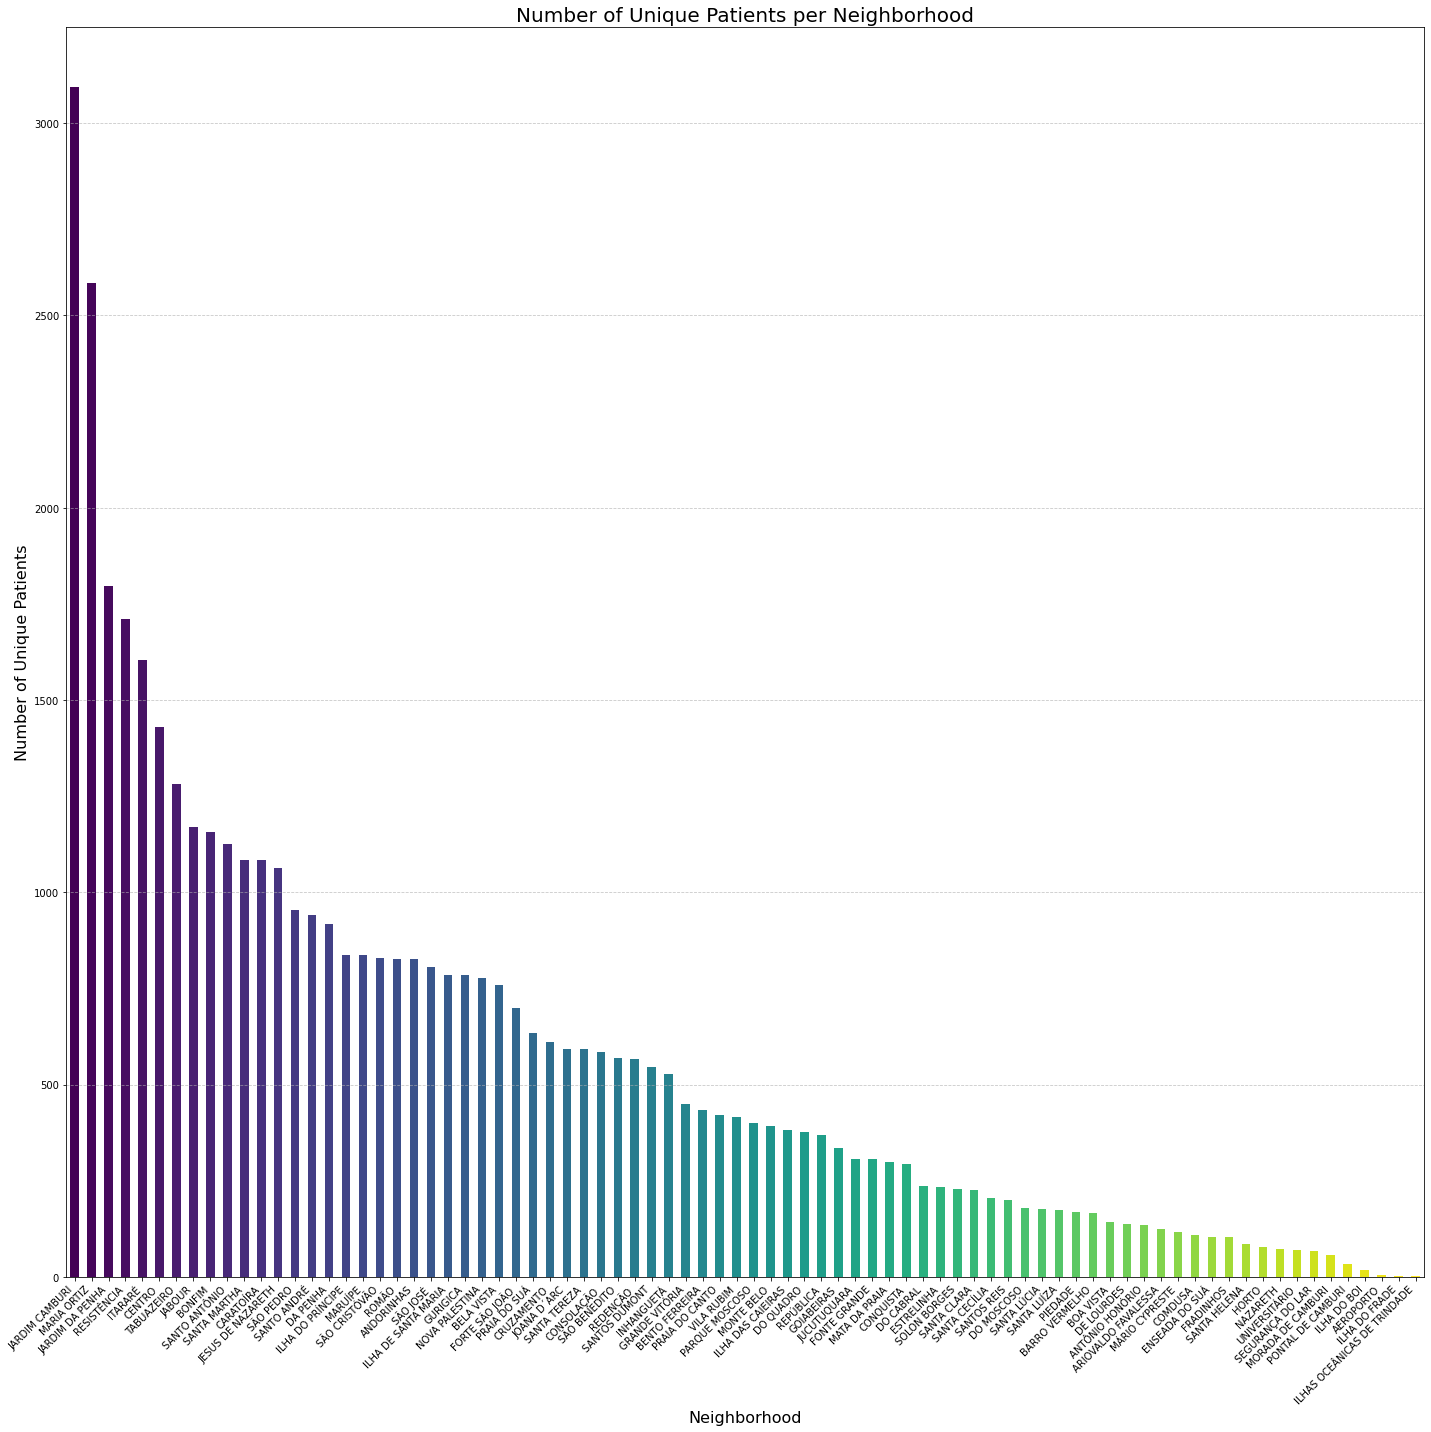

In [39]:
# Generate a gradient color map
colors = cm.viridis(np.linspace(0, 1, len(unique_patients_per_neighborhood)))

plt.figure(figsize=(20, 20))
unique_patients_per_neighborhood.plot(
    kind='bar', 
    color=colors
)
plt.title('Number of Unique Patients per Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Number of Unique Patients', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

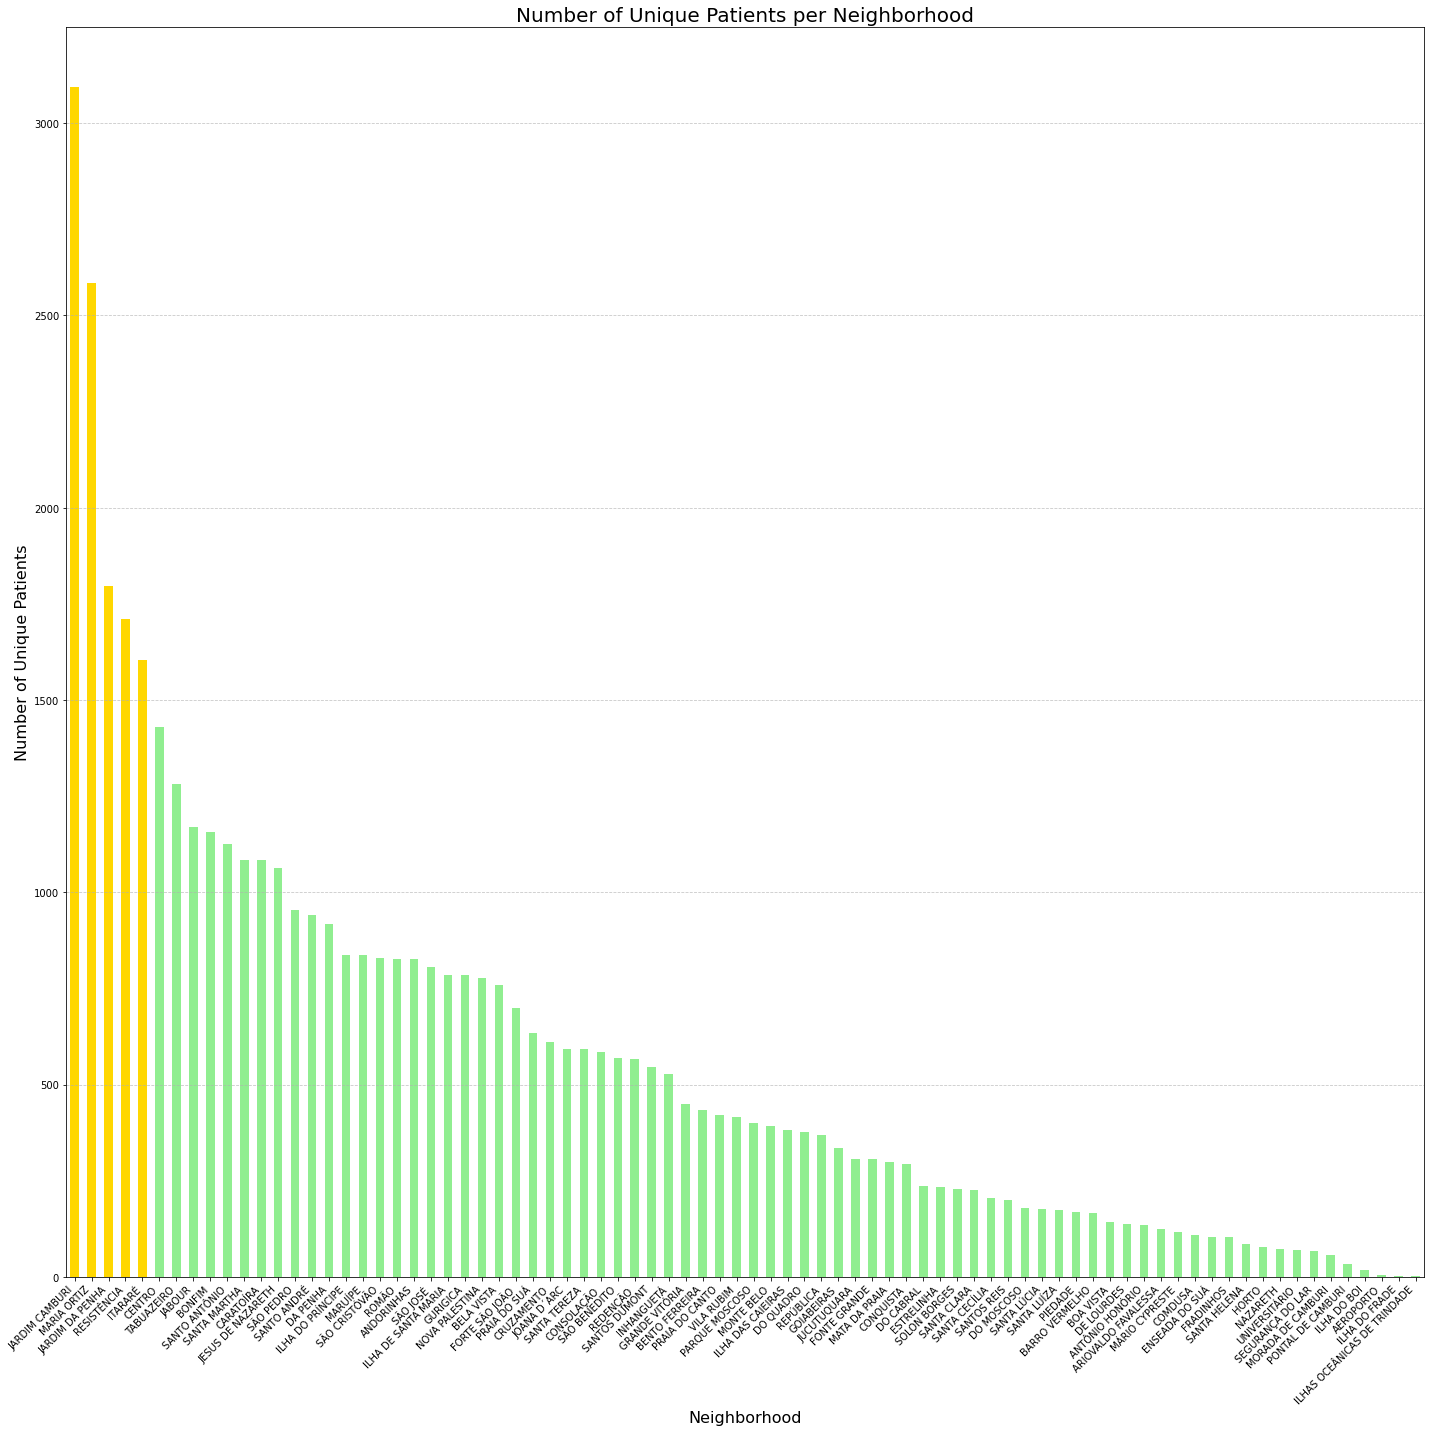

In [40]:
# Highlight top 5 neighborhoods
top_n = 5
colors = ['gold' if i < top_n else 'lightgreen' for i in range(len(unique_patients_per_neighborhood))]

plt.figure(figsize=(20, 20))
unique_patients_per_neighborhood.plot(
    kind='bar', 
    color=colors
)
plt.title('Number of Unique Patients per Neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Number of Unique Patients', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'waiting_time', 'appointment_weekday',
       'waiting_time_category', 'age_group'],
      dtype='object')

### Who are our patients? How old are they, how many are there?

In [44]:
df['patient_id'].nunique() # number of unique patients - there are 45,837 unique patient IDs

45837

#### Analyzing the effect of age, we'll group by no_show and calculate the average and distribution of age for patients who showed up (No) vs. those who did not (Yes).

In [54]:
print(df['no_show'].dtype)
print(df['no_show'].unique)


object
<bound method Series.unique of 5          No
6         Yes
7         Yes
9          No
10         No
         ... 
110522     No
110523     No
110524     No
110525     No
110526     No
Name: no_show, Length: 71954, dtype: object>


In [55]:
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1}).astype(float)  # Convert to numeric

In [56]:
#print("Infinite values in 'age':", np.isinf(df['age']).sum())
#print("Infinite values in 'no_show':", np.isinf(df['no_show']).sum())
print(np.isinf(df['no_show'].to_numpy()).sum())  # Check for infinite values


0


In [57]:
# Group by no_show and calculate average age
age_analysis = df.groupby('no_show')['age'].describe()
print(age_analysis)

# Visualize age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='no_show', kde=True, bins=30, palette='Set2')
plt.title('age Distribution by Show/no_show Status', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='no_show', labels=['Showed Up', 'Did Not Show'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

> The majority of patients are between the ages of 0 and 60. While younger children (ages 0-10) seem to have a high representation in appointments, their no_show rates are relatively proportional to their presense. 

> There doesn't appear to be a strong correlation between age and no_show rates. However, younger children might show slightly higher variability, which could be due to reliance on their parents to arrive at appointments. 

> Age doesn't appear to be a significant predictor of no_show behavior, though young children and older adults might require additional context to confirm this.

> Looking at no_show rates from a slightly different angle, looking through the lenses of age and neighborhoods

In [ ]:
# examining no_show rates by gender using a Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df, 
    x='gender', 
    y='age', 
    hue='no_show', 
    split=True, 
    palette=['salmon', 'lightblue']
)
plt.title('age Distribution by gender and no_show Status', fontsize=16)
plt.xlabel('gender', fontsize=14)
plt.ylabel('age', fontsize=14)
plt.legend(title='no_show', labels=['Showed Up', 'Did Not Show'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> For females (F), there’s a higher concentration of younger patients who showed up (light blue), with a smoother taper as age increases. However, no_shows (salmon) are relatively consistent across age groups.
For males (M), the distribution appears slightly flatter, with fewer younger males showing up and a somewhat more consistent no_show rate across ages.
>
> We believe a simple pie chart will illustrate these findings in a more intuitive way. See below.

#### no_show Differences:

> The overlap of "Showed Up" and "Did Not Show" indicates that gender alone may not strongly differentiate between show/no_show status.
Both genders have significant representation in the younger age range for "Showed Up," but the "Did Not Show" distribution is slightly wider, especially among older patients.
Insights:

> Age seems to play a more noticeable role in no_show rates than gender. For instance, younger patients show a higher likelihood of attending appointments regardless of gender.


In [ ]:
# Group data by gender and no_show, count occurrences
gender_no_show_counts = df.groupby(['gender', 'no_show']).size().unstack()

# Create pie charts, which are easier for people to interpret than violin charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot pie chart for females
axes[0].pie(
    gender_no_show_counts.loc['F'], 
    labels=['Showed Up', 'Did Not Show'], 
    autopct='%1.1f%%', 
    colors=['lightblue', 'salmon'], 
    startangle=90
)
axes[0].set_title('Female no_show Rates', fontsize=14)

# Plot pie chart for males
axes[1].pie(
    gender_no_show_counts.loc['M'], 
    labels=['Showed Up', 'Did Not Show'], 
    autopct='%1.1f%%', 
    colors=['lightblue', 'salmon'], 
    startangle=90
)
axes[1].set_title('Male no_show Rates', fontsize=14)

plt.suptitle('no_show Rates by gender', fontsize=16)
plt.tight_layout()
plt.show()


These pie charts illustrate the no-show rates for male and female patients. Interestingly, the no-show rates are nearly identical for both genders, with males showing a slightly lower rate of no-shows (20.0%) compared to females (20.3%). This suggests that gender is not a significant factor influencing appointment attendance. Future analyses could explore other variables, such as age, socioeconomic status, or neighborhood, to uncover more impactful predictors of no-show behavior.

#### Analyzing the effect of scholarships

In [ ]:
# Calculate no_show rate by scholarship status
scholarship_analysis = df.groupby(['scholarship', 'no_show']).size().unstack()
scholarship_analysis['no_show Rate (%)'] = (scholarship_analysis['Yes'] / scholarship_analysis.sum(axis=1)) * 100
print(scholarship_analysis)

# Bar chart to visualize
plt.figure(figsize=(8, 6))
scholarship_analysis['no_show Rate (%)'].plot(kind='bar', color=['salmon', 'teal'])
plt.title('no_show Rate by scholarship Status', fontsize=16)
plt.xlabel('scholarship Status (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('no_show Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> Patients enrolled in the scholarship program (which likely is indicative of low-income status) have a slightly higher no_show rate (23.7%) compared to those not enrolled (19.8%). This difference may suggest that financial challenges or other socioeconomic factors influence attendance, but the difference isn't drastic. 

> Scholarship enrollment may slightly correlate with higher no_show rates, but other underlying factor (e.g. transportation, access, excessive texting burnout) might better explain this discrepancy.

> On the whole, sms reminders appear counterproductive, as the data here shows they correlate with higher no_show rates. This could suggest unintended effect of the  notification system or selection bias, where sms recipients may inherently differ from non-recipients. 

#### Analyzing the effect of sending text messages (sms_received)

In [ ]:
# Calculate no_show rate by sms_received
sms_analysis = df.groupby(['sms_received', 'no_show']).size().unstack()
sms_analysis['no_show Rate (%)'] = (sms_analysis['Yes'] / sms_analysis.sum(axis=1)) * 100
print(sms_analysis)

# Bar chart to visualize
plt.figure(figsize=(8, 6))
sms_analysis['no_show Rate (%)'].plot(kind='bar', color=['salmon', 'teal'])
plt.title('no_show Rate by sms Notification', fontsize=16)
plt.xlabel('sms Received (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('no_show Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> Surprisingly, patients who received sms reminders had a significantly higher no_show rate (27.6%) compared to those who didn't receive reminders (16.7%). This might seem counterintuitive and warrants further investigation. One hypothesis could be that sms reminders highlight the option to cancel or disregard the appointment. 

In [ ]:
# Group by age and count the number of patients for each age
age_counts = df.groupby('age')['patientid'].count().reset_index()

# Rename columns for better readability
age_counts.columns = ['age', 'Patient Count']

# Sort the DataFrame by age
age_counts = age_counts.sort_values(by='age', ascending=True)

# Display the result
print(age_counts)

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(age_counts['age'], age_counts['Patient Count'], color='skyblue')
plt.title('Patient Count by age', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> This is an interesting graph. Clearly mothers are bringing babies in to their doctor appointments.

> But this isn't very readable; so I'll be breaking ages into 5-year ranges next.

In [ ]:
df['age'].min() #remove

In [ ]:
# Remove erroneous age '-1' as it's impossible, unless it's prenatal. At any rate, there's only a single one of this value, so removing it won't affect the data. 
df_cleaned = df[(df['age'] >= 0) & (df['age'] <= 104)].copy()   # Use .copy() to ensure we're working on a copy.

# Create 5-year age ranges
bins = range(0, df_cleaned['age'].max() + 5, 5)  # Create bins up to the max age in steps of 5
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Generate labels for the ranges dynamically with a for loop

# Add a new column for the age ranges
df_cleaned.loc[:, 'age Range'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each range
age_range_counts = df_cleaned['age Range'].value_counts().sort_index()

# Display the table
age_range_table = pd.DataFrame({'age Range': age_range_counts.index, 'Patient Count': age_range_counts.values})
print(age_range_table)

# Plot the age ranges as a bar chart
plt.figure(figsize=(12, 6))
age_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Patient Count by age Range', fontsize=16)
plt.xlabel('age Range', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Much better. It's easy to see how children visit the doctor during early years, and how the number of people visiting appointments is steady over the age ranges, until it drops off for older people. 

In [ ]:
# put the total number of unique patients into a variable for use
total_unique_patients = df_cleaned['patientid'].nunique()

# Calculate unique patients for each neighborhood
unique_patients_per_neighborhood = df_cleaned.groupby('neighbourhood')['patientid'].nunique().sort_values(ascending=False)

# Sum the unique patients in the top 5 neighborhoods
top_5_total = unique_patients_per_neighborhood.head(5).sum()

# Calculate the percentage of patients from the top 5 neighborhoods
top_5_percentage = (top_5_total / total_unique_patients) * 100

print(f"{top_5_percentage:.2f}% of people come from the top 5 neighborhoods.")


In [ ]:
# a plot of the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('age Distribution of Patients', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This histogram provides an overview of the age distribution of patients in the dataset. The data reveals that the largest patient group is children under the age of 10, with the number of patients generally decreasing as age increases. There is also a noticeable concentration of patients in the 30–60 age range, likely reflecting the active adult population. The sharp decline in patient numbers above age 70 is expected given lower population proportions in these age groups. This distribution can provide context for interpreting trends in no-show rates across different age groups. 


Questions for future study: What strategies could healthcare providers use to implement targeted interventions based on these findings? Further analysis could explore whether age influences appointment attendance behavior.



In [ ]:
# Percentage of patients from Jardim Camburi
jardim_percentage = round((df['neighbourhood'].value_counts(normalize=True)['JARDIM CAMBURI'] * 100),1)
print(f"{jardim_percentage:.2f}% of patients came from Jardim Camburi.")

# Percentage of patients who were female
female_percentage = round((df['gender'].value_counts(normalize=True)['F'] * 100),1)
print(f"{female_percentage:.2f}% of patients were female.")

# Percentage of patients who did not show up
no_show_percentage = round((df['no_show'].value_counts(normalize=True)['Yes'] * 100),1)
print(f"{no_show_percentage:.2f}% of patients did not show up for their appointments.")

# Percentage of patients who showed up
show_percentage = round((df['no_show'].value_counts(normalize=True)['No'] * 100),1)
print(f"{show_percentage:.2f}% of patients showed up for their appointments.")


#### Here's what I can see from the data so far:
* Sixty five percent of patients were female, with almost a quarter of the patients coming from mostly five neighborhoods: Jardim Camburi, Maria Ortiz, Jardim da Penha, Resiste'ncia and Itarare. 
* There are 110,527 rows of records, and the same amount of unique appointment IDs, with 62,299 unique patient IDs.
* The eldest person in this dataset is 115 years old, and the youngest, 0 (meaning less than 1 year of age), with a median age of 37. The eldest persons may be outliers, and that may have to be taken into account with any mean calculations.
* A standard deviation of 23 means that most data points deviate by about 23 units from the mean on average, so 95% of patients are within two standard deviations of the mean, or simply put, 95% of patients are between the ages of 9 and 83.
* The number of elderly patients attending appointments drastically drops after age 70.
* Eighty one unique neighborhoods are represented in this dataset, with Jardim Camburi having the largest representation with over half of residents there.
* Nearly eight out of ten people show up for their appointments. 

In [ ]:
df.hist(figsize=(10,10));

Taking a last look at distributions over the different column values, we see these histograms provide an overview of the distribution of key variables in the dataset. The age variable shows a high concentration of patients in the younger age groups, with a steady decline as age increases. For categorical variables such as scholarship, hypertension, diabetes, alcoholism, and sms_received, the data is heavily skewed, with the majority of binary values being 0 (indicating absence of the condition or feature). The handicap variable reveals that most patients have a handicap value of 0, with progressively fewer patients having higher handicap levels. We see the scheduledday and appointmentday histograms indicate the dataset is time-bounded, focusing on a specific period in 2016. 

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 4a - Logistic Regression <a class="anchor" id="udacity_page_4"></a>

# Research Question 1: What factors are important for predicting whether a patient will show up for their appointment? Verifiying data readiness and performing regression
[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


#### xxxx


[Return to Top](#top)

In [ ]:
print(df.isnull().sum())


In [ ]:
# Convert patientid to int64 to eliminate the scientific notation formatting
df['patient_id'] = df['patient_id'].astype('int64')

# Convert gender and no_show to 0s and 1s
df['gender'] = df['gender'].map({'M': 0, 'F': 1})  # 0 for Male, 1 for Female
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})  # 0 for show, 1 for no-show

#recode other categorical columns and include drop_first-True to avoid perfect multicollinearity with dummy columns
df = pd.get_dummies(df, columns=['age_group', 'appointment_weekday', 'neighbourhood'], drop_first=True)



In [ ]:
#convert Trues and Falses to 1s and 0s for uniformity
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 5 - Research Question 2 <a class="anchor" id="udacity_page_5"></a>
# How does the no_show rate vary across neighborhoods?

We explored neighborhood-level patterns by calculating and visualizing no-show rates for all neighborhoods.

__Findings:__
Highest No-show Rates:
* Ilha do Príncipe: 53%
* Parque Industrial: 43%<br>

These neighborhoods exhibit significantly higher no-show rates compared to the dataset average (20%).

Lowest No-show Rates:
* Enseada do Suá: 11.5%<br>
* Santa Cecília: 13.2%<br>

These neighborhoods show exemplary adherence, with no-show rates significantly below average.

These disparities highlight the potential role of localized factors (e.g., socioeconomic conditions, accessibility of healthcare facilities) in influencing no-show rates.

Neighborhood-based interventions, such as targeted SMS campaigns or transportation support, may help address high no-show rates in neighborhoods like Ilha do Príncipe and Parque Industrial. Further investigation into socioeconomic and logistical barriers in these areas is recommended.

[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">


In [ ]:
unique_patients_per_neighborhood = (
    df.groupby('neighbourhood')['patientid'].nunique().sort_values(ascending=False)
).reset_index()

# Rename columns for better readability
unique_patients_per_neighborhood.columns = ['Neighborhood', 'Unique Patients']

# Create an interactive Plotly bar chart - Gentle Reader, hover your mouse over each bar for individualized information.
fig = px.bar(
    unique_patients_per_neighborhood,
    x='Neighborhood',
    y='Unique Patients',
    title='Number of Unique Patients per Neighborhood',
    labels={'Neighborhood': 'Neighborhood', 'Unique Patients': 'Number of Unique Patients'},
    text='Unique Patients'
)

# Customize layout
fig.update_traces(textposition='outside', marker_color='lightgreen')
fig.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    template='plotly_white',
    height=800,  # Adjust height
    width=1200   # Adjust width
)

# Show the figure
fig.show()


> Hover your mouse over a bar in this interactive chart which shows the number of individual patients in each neighborhood. Further study could be shown as to what proportion of residents are patients. In other words, larger towns may have a higher number of patients than smaller towns simply because there are more people. If ratios were put together for each town, those with the highest proportion of residents seeking medical care could be further studied. 

In [ ]:
# Prepare data: Calculate unique patients, average age, and no_show rate for each neighborhood to be shown in tooltip
neighborhood_stats = df.groupby('neighbourhood').agg(
    unique_patients=('patientid', 'nunique'),
    avg_age=('age', 'mean'),
    no_show_rate=('no_show', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

# Rename some columns for better readability
neighborhood_stats.columns = ['Neighborhood', 'Unique Patients', 'Average age', 'no_show Rate (%)']

# Create a Plotly bar chart with enhanced tooltip
fig = px.bar(
    neighborhood_stats,
    x='Neighborhood',
    y='Unique Patients',
    title='Number of Unique Patients per Neighborhood',
    labels={'Neighborhood': 'Neighborhood', 'Unique Patients': 'Number of Unique Patients'},
    text='Unique Patients',  # Display values on the bars
    hover_data={'Average age': ':.1f', 'no_show Rate (%)': ':.1f'}  # Format additional tooltip data
)

# Customize layout of bar graph
fig.update_traces(textposition='outside', marker_color='lightgreen')
fig.update_layout(
    xaxis_tickangle=45,
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    template='plotly_white',
    height=800,
    width=1200
)

# Show the figure
fig.show()

> Hover your mouse over this interactive chart to see the average age and rate of no_shows in addition to the number of patients each neighborhood is reporting. Remember, the average age for the entire dataset is 37 years of age. 

> The data shows that these neighborhoods have exceptionally low no_show rates, with Enseada do Suá having one of the lowest (~11.5%), followed by other neighborhoods such as Santa Cecília. This suggests these areas could serve as a model for improving appointment adherence in higher no_show areas. 

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 6 - Research Question 3 <a class="anchor" id="udacity_page_6"></a>
# Do chronic conditions (e.g., hypertension, diabetes, alcoholism) affect the likelihood of showing up?
To evaluate the effect of chronic conditions, we analyzed no-show rates across:

* Hypertension
* Diabetes
* Alcoholism
* Handicap
  
__Findings:__
Hypertension, Diabetes, Alcoholism: These conditions show no significant association with no-show rates, as evidenced by similar rates for those with and without these conditions.

Handicap: A striking trend is observed:
> __Patients with handicap levels 3 and 4 have significantly higher no-show rates (~28% and ~40%) compared to lower levels or no handicap.__


A chi-square test confirmed that this association is statistically significant (p < 0.05).
This finding suggests that patients with severe disabilities face barriers to attending appointments. Potential solutions include offering transportation assistance or scheduling flexibility for patients with higher handicap levels.
[Back to Top](#udacity_toc)

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [ ]:
# the highest correlation is for hypertension and age, hypertension and diabetes, and diabetes and age
df.corr().style.background_gradient(cmap='coolwarm') # cividis is optimized for colorblind viewers

> Looking at this correlation plot, we see of course a giagonal row of yellow perfect 1s as each column correlates with itself. Of note in the other cells, we see a moderate positive correlation (.50) between hyptertension and age, which makes sense. Similarly there is a weaker but still positive correlation (.29) between diabetes and age. There's a moderate positive correlation (.43) between hypertension and diabetes, as well, which aligns with medical studies showing comorbidity between these conditions. 

> Alcoholism shows very weak correlations *<.1) with all other variables, indicating in this dataset, at least, that alcoholism doesn't significantly relate to other features in this population. 

> Of note is the correlation between SMS notification and other variables is very weak (<.05).

> Scholarship has weak negative correlations with variables like age (-.09) and hyptertension (-.02), suggesting that younger individuals may be slightly more likely to have scholarships possibly reflecting some income demographics. 

> Overall, the strongest relationships are between hypertension and age, hypertension and diabetes and diabetes and age. Understanding how these conditions might affect no-show rates may yield some benefit. 

> Variables like SMS notifications, alcoholism and scholarship show minimal correlation with other factors, indicating they may act more independently in this dataset. 



In [ ]:
# age hypertension scatter with line fit
# there are more people with hypertension among older patients, as correlation of 0.5 from above suggests
hypertension_mean = df['hypertension'].groupby(df['age']).mean()
ages = df['age'].unique()
sns.regplot(x = ages, y = hypertension_mean)
plt.xlabel('age')
plt.show()

> This scatter plot with a regression line shows the relationship between age and the likelihood of having hypertension. The positive slope of the regression line indicates that older patients are more likely to have hypertension, compared to younger ones.
The data points display a moderate spread around the regression line, suggesting a noticeable but not perfect correlation. This aligns with the earlier calculation of a correlation coefficient of approximately 0.5.
This finding reinforces the understanding that age is a significant factor in the prevalence of hypertension, likely due to physiological changes and cumulative risk factors associated with aging.

In [ ]:
chronic_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

for condition in chronic_conditions:
    condition_stats = df.groupby(condition)['no_show'].value_counts(normalize=True).unstack() * 100
    print(f"No-show rates for {condition}:")
    print(condition_stats)
    print()


> This table provides a breakdown of no-show rates (proportions of patients who did or did not show up for their appointments) for different chronic conditions: hypertension, diabetes, alcoholism, and handicap. Patients without hypertension (0) had a no-show rate of 20.90%.
Patients with hypertension (1) had a slightly lower no-show rate of 17.30%. This suggests that hypertensive patients may have slightly better adherence to appointments.
Patients without diabetes (0) had a no-show rate of 20.36%. Patients with diabetes (1) had a slightly lower no-show rate of 18.00%. Diabetic patients also seem to show a slight improvement in appointment adherence compared to non-diabetic patients.
Patients without alcoholism (0) and those with alcoholism (1) have nearly identical no-show rates (20.19% vs. 20.15%). This suggests that alcoholism does not significantly influence appointment attendance in this dataset. 
No-show rates decrease significantly with increasing handicap levels: Patients with no handicap (0) had a no-show rate of 20.23%.
Patients with a handicap level of 4 had a markedly higher no-show rate of 33.33%. This demonstrates a noticeable trend: higher handicap levels correlate with increased no-show rates, highlighting a significant barrier for severely handicapped individuals.

>This data shows that while hypertension and diabetes show slightly better adherence rates, alcoholism has no discernible impact. However, increasing handicap levels are associated with a considerable increase in no-show rates, making it a crucial area for targeted intervention.








In [ ]:
chronic_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

# Initialize a figure for subplots
plt.figure(figsize=(16, 8))

# Iterate through each condition to create barplots
for i, condition in enumerate(chronic_conditions, 1):
    # Calculate the proportion of no-shows for each condition
    no_show_rates = df.groupby(condition)['no_show'].value_counts(normalize=True).unstack() * 100

    # Plot the proportion of 'Yes' (No-shows)
    plt.subplot(1, len(chronic_conditions), i)
    no_show_rates['Yes'].plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
    plt.title(f"No-show Rate by {condition.capitalize()}", fontsize=14)
    plt.ylabel("No-show Rate (%)")
    plt.xlabel(condition.capitalize())
    plt.ylim(0, 50)  # Adjust y-axis for better visualization

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



> Based on these bar plots, the data shows patients with hypertension have a slightly higher no-show rate compared to those without hypertension.
> Patients with diabetes and alcoholism both have a very similar no-show rate to those without those two conditions, suggesting neither alcoholism nor diabetes influence whether a patient shows up for their appointment or not.
> There is a clear trend of increasing no-show rates in the alternating blue and teal bars, as the handicap level increases. Patients with a higher handicap score (3 or 4) exhibit significantly higher no-show rates, exceeding 30%. This could indicate accessibility issues, transportation challenges, or other barriers faced by patiends with severe handicaps. Let's explore this more in the next graph.
> 
> The most notable insight is the strong relationship between higher handicap levels and increased no-show rates. This bears further investigation, to be sure.  Hypertension shows a slight correlation with higher no-show rates, while diabetes and alcoholism seem to have little to no effect on appointment attendance. Further investigation into the challenges faced by handicapped patients might reveal actionable insights to reduce their no-show rates. 

In [ ]:
chronic_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

# Create a stacked bar plot
plt.figure(figsize=(16, 6))

# Iterate through each chronic condition and create subplots
for i, condition in enumerate(chronic_conditions, 1):
    # Group data for the specific condition
    grouped = df.groupby([condition, 'no_show']).size().unstack(fill_value=0)
    proportions = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # Create subplot for the condition
    plt.subplot(1, len(chronic_conditions), i)
    proportions.plot(
        kind='bar',
        stacked=True,
        color=['blue', 'salmon'],
        ax=plt.gca(),
        legend=False
    )

    # Customize the subplot
    plt.title(f"No-show Rate by {condition.capitalize()}", fontsize=14)
    plt.xlabel(condition.capitalize(), fontsize=12)
    plt.ylabel("Proportion (%)", fontsize=12)
    plt.ylim(0, 100)

# Add a legend outside the subplots
plt.legend(['Showed Up', 'Did Not Show'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

  

> Looking at the chronic conditions through a stacked bar graph, it's easier to see the corresponding rise in no-show rates to the increasing levels of the handicap column. I'd like to see if neighborhoods with higher handicap rates (3 and 4, since those show the starkest changes) also show higher no-show rates. 

In [ ]:
# Combine Handicap levels 3 and 4 to filter out noise
df['handicap_combined'] = df['handicap'].replace({3: '3-4', 4: '3-4'})

# Create a contingency table
contingency_table_combined = pd.crosstab(df['handicap_combined'], df['no_show'])
print("Contingency Table (Combined):")
print(contingency_table_combined)

# Chi-square test with combined levels
chi2_combined, p_combined, dof_combined, expected_combined = chi2_contingency(contingency_table_combined)

print("\nChi-Square Test Results (Combined):")
print(f"Chi-Square Statistic: {chi2_combined}")
print(f"P-Value: {p_combined}")
print(f"Degrees of Freedom: {dof_combined}")

if p_combined < 0.05:
    print("\nConclusion: There is a significant association between combined handicap levels and no-show rates.")
else:
    print("\nConclusion: There is no significant association between combined handicap levels and no-show rates.")


> Patients with higher handicap levels (combined 3 and 4) exhibit different no-show behavior compared to those with lower or no handicaps, and a p value of less than .05 indicates that significance. The p-value of 0.03596 is less than the typical significance threshold of 0.05, indicating statistical significance. This result suggests there is a significant association between the combined handicap levels (3-4) and no-show rates.
The importance of stratification is revealed when combining levels 3 and 4 helped reveal an association that was not significant when analyzing them separately, possibly due to low individual counts.
This finding implies that healthcare facilities might focus additional resources or support on patients with more severe handicaps to address potential barriers leading to no-shows. 
After combining handicap levels 3 and 4 into a single category and reanalyzing the data, this reveals it's not a matter of chance that higher handicap levels lead to more no-shows. There is indeed a correlation that warrants further investigation - and actionable steps that can be taken to address this. 

<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

# Page 7 - Conclusions <a class="anchor" id="udacity_page_7"></a>

This analysis explored the factors influencing patient no-show rates for medical appointments, focusing on three research questions:

1. What factors are important for predicting whether a patient will show up for their appointment?<br>
2. How does the no-show rate vary across neighborhoods?<br>
3. Do chronic conditions (e.g., hypertension, diabetes, alcoholism, handicap) affect the likelihood of showing up?
   
__Key Findings:__

__Handicap Levels and No-show Rates:__

> The significant association between higher handicap levels (levels 3 and 4) and increased no-show rates highlights an area where targeted interventions could have a meaningful impact.
Patients with the most severe handicaps had the highest no-show rates (~40%), compared to lower rates for other patients.
The chi-square test confirmed this relationship is statistically significant (p < 0.05), strengthening the conclusion that handicap severity plays an important role in no-show behavior.<br>
__Actionable Insights:__ Healthcare providers could explore strategies like improved accessibility, enhanced communication, or specialized support for patients with severe disabilities to reduce no-show rates.

__Age and No-show Rates:__

> Age does not appear to be a strong predictor of no-show behavior. While younger children (ages 0-10) and older adults (60+) are proportionally represented in the data, their no-show rates are relatively consistent with other age groups.
Slight variability was observed among young children, likely due to reliance on parental availability, but this finding was not statistically significant.
Further context (e.g., family dynamics or transportation availability) might be needed to confirm these observations.

__Scholarship Status and No-show Rates:__

> Patients enrolled in the scholarship program, a potential proxy for low-income status, had a slightly higher no-show rate (23.7%) compared to those not enrolled (19.8%).
While the difference is not drastic, it may suggest financial or socioeconomic barriers influencing attendance.<br>
__Recommendation:__ Programs aimed at mitigating financial challenges or addressing socioeconomic barriers could help reduce no-show rates among scholarship recipients.

__SMS Notifications and No-show Rates:__

> Counterintuitively, patients who received SMS reminders had a higher no-show rate (27.6%) compared to those who did not receive reminders (16.7%).
This suggests unintended effects of the SMS notification system, such as inadvertently providing patients with an option to cancel or disregard their appointments. Alternatively, it could reflect selection bias, where SMS recipients may inherently differ from non-recipients.
__Recommendation:__ Revisiting the SMS notification system is critical to ensure it incentivizes attendance. Testing alternative communication strategies, such as personalized follow-up calls or app-based notifications, could help address this issue.

__Neighborhood and No-show Rates:__

> Neighborhoods exhibited stark differences in no-show rates. Ilha do Príncipe (53%) and Parque Industrial (43%) had the highest rates, likely due to socioeconomic or logistical challenges.
Conversely, Enseada do Suá (11.5%) and Santa Cecília (13.2%) had the lowest rates, suggesting these areas may offer lessons in successful patient outreach or access.
Recommendation: Targeting high-risk neighborhoods with tailored interventions, such as transportation assistance or community-based reminders, could help address structural barriers to attendance.

__Limitations:__

* Limited Socioeconomic Data: While neighborhood and scholarship status provided insight into socioeconomic factors, more granular data on income, transportation access, and employment status would have enriched the analysis.
* Potential Biases in SMS Notifications: The unexpected finding regarding SMS reminders suggests either a flawed system or selection bias. Further investigation into the notification system is warranted.
* Cultural and Regional Context: These findings reflect healthcare access in Brazil and may not generalize to other countries with different systems or challenges.
* Correlation, Not Causation: While statistical tests, such as chi-square, identified associations, they do not imply causation. Future research should explore causal relationships using controlled experiments or predictive modeling.


__Future Research Directions:__

* Improved Accessibility for Patients with Disabilities: Targeted interventions, such as transportation assistance, telehealth options, or specialized outreach, could support patients with severe handicaps.
* Revisiting Reminder Systems: Exploring alternative strategies, such as personalized follow-ups, app-based notifications, or community reminders, may reduce no-show rates.
Understanding Neighborhood-Level Factors: Conducting surveys or interviews in high-risk neighborhoods can help uncover structural challenges (e.g., transportation barriers, scheduling conflicts).
* Predictive Modeling: Developing machine learning models to predict no-show likelihood based on patient characteristics could enable proactive outreach.

__Summary:__
In this analysis we have identified actionable insights into patient no-show behavior, with a particular focus on handicap levels, neighborhood disparities, and the effectiveness of reminder systems. While limitations remain, these findings offer a foundation for targeted strategies to improve healthcare access and reduce missed appointments. Collaboration with local healthcare providers and policymakers will be essential to translate these insights into meaningful change.

[Back to Top](#udacity_toc)
<hr style="height:10px;border-width:0;color:darkorange;background-color:darkorange">

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Marcy_Misner_Investigate_Dataset.ipynb